In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load countries clean data
benin  = pd.read_csv("../data/benin_clean.csv")
togo = pd.read_csv("../data/togo_clean.csv")
sierra = pd.read_csv("../data/sierraleone_clean.csv")


#joind into one data frame
benin["Country"] = "Benin"
togo["Country"] = "Togo"
sierra["Country"] = "Sierra Leone"

df = pd.concat([benin, togo, sierra], ignore_index=True)

df.tail()

,Unnamed: 0,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,...,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Country
1543512,525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,...,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN,Sierra Leone
1543513,525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,...,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN,Sierra Leone
1543514,525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,...,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN,Sierra Leone
1543515,525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,...,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN,Sierra Leone
1543516,525599,2022-10-30 00:00,-1.7,-0.1,-3.4,0.0,0.0,23.9,100.0,0.0,...,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN,Sierra Leone


<Axes: xlabel='Country', ylabel='GHI'>

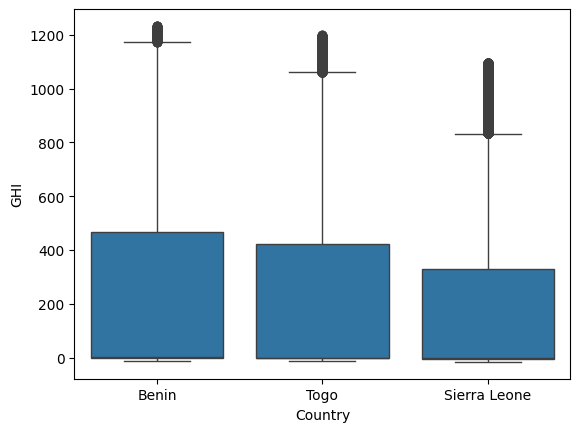

In [4]:
sns.boxplot(data = df, x = "Country", y = "GHI")

In [5]:
summary = df.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"])
summary

GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         236.234508    0.7  328.288787  166.896673   -0.1  262.081997   
Sierra Leone  185.000024   -0.4  279.019460  104.128943   -0.1  200.954182   
Togo          223.859675    0.5  317.306277  147.975931    0.0  247.683690   

                     DHI                     
                    mean median         std  
Country                                      
Benin         111.656477    0.5  153.099749  
Sierra Leone  108.104278   -0.6  153.691835  
Togo          112.781249    1.5  151.571744

In [7]:
#one-way ANOVA(analysis of variance)
from scipy.stats import f_oneway

benin_ghi = benin["GHI"]
togo_ghi = togo["GHI"]
sierra_ghi = sierra["GHI"]

f_stat, p_value = f_oneway(benin_ghi, togo_ghi, sierra_ghi)

print(f_stat, p_value)
#The differences in GHI across Benin, Togo, and Sierra Leone are statistically significant, not due to chance

3833.1842028139195 0.0


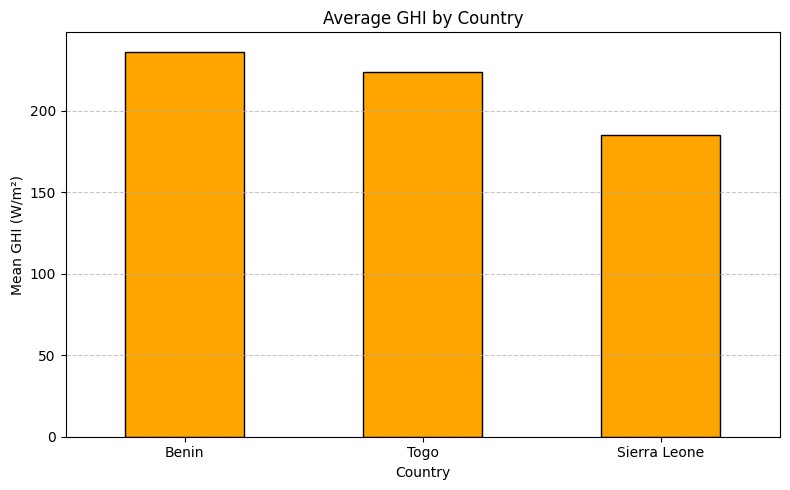

In [8]:

ghi_means = df.groupby("Country")["GHI"].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
ghi_means.plot(kind="bar", color="orange", edgecolor="black")
plt.title("Average GHI by Country")
plt.ylabel("Mean GHI (W/m²)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 🌍 Cross-Country Solar Potential Summary

- **Benin** has the highest average GHI, followed by **Togo**, then **Sierra Leone**.
- **Sierra Leone** shows the lowest variability in GHI and DNI, suggesting more consistent but lower solar output.
- A one-way **ANOVA test** confirmed the differences in GHI across the three countries are **statistically significant** (F = 3833.18, p ≈ 0).
- This statistical evidence supports prioritizing Benin for solar farm deployment, especially where high average output is key.
- Depending on strategic priorities (e.g., consistency vs. maximum yield), Sierra Leone may still be valuable in certain contexts.

